### Top 50 Tracks list in Spotify 2020 analysis

In [2]:
# Importing libraries and loading data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

df = pd.read_csv('spotifytoptracks.csv', index_col=0)
df

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.3340,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.5400,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.6420,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.8940,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.6790,123.950,183290,Nu-disco
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.4970,89.977,181733,Hip-Hop/Rap
6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.5570,95.390,174000,Pop
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.3480,144.026,173333,Hip-Hop/Rap
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.2360,127.087,159382,R&B/Hip-Hop alternative
9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,0.405,0.501,1,-5.679,0.75100,0.0319,0.000000,0.1050,0.4460,109.891,182161,Alternative/Indie


#### How many observations are there in this dataset and how many features this dataset has?

In [3]:
print(f'This dataset has {df.shape[0]} observations and {df.shape[1]} features.')

This dataset has 50 observations and 16 features.


In [4]:
# Removing whitespaces at the beginning of the string and replacing whitespace between composed genres with '-' 
# using regex

df['genre'].replace(r'^\s+', '', regex=True, inplace=True)
df['genre'].replace(r'\s+', '-', regex=True, inplace=True)

#### Which of the features are categorical and which are numerical?

* Categorical: Artist, Album, Track Name, Track ID, Key, Tempo, Genre.
* Numerical: Energy, Danceability, loudness, acousticness, speechiness, instrumentalness, liveness, valence, duration ms.

#### Handling missing values, checking duplicates and treating outliers

In [5]:
# Checking if there is any null value in the dataset
df.isnull().any()

artist              False
album               False
track_name          False
track_id            False
energy              False
danceability        False
key                 False
loudness            False
acousticness        False
speechiness         False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
genre               False
dtype: bool

In [6]:
# Checking if there is any duplicate in the dataset

df.duplicated().any()

False

To treat the outliers we are going to check the distribution of the data for the following features using a box plot from matplitlib. 

* #### Energy
Measured from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* #### Danceability
Measured from 0.0 to 1.0 represents how suitable a track is for dancing based on a combination of  musical elements including tempo, rhythm stability, beat strength, and overall regularity.
* #### Loudness
The overall loudness of a track in decibels. Values typically range between -60 and 0 db
* #### Acousticness
Measured from 0.0 to 1.0 Predicts whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* #### Speechiness
Speechiness detects the presence of spoken words in a track. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values below 0.33 most likely represent music and other non-speech-like tracks.
* #### Instrumentalness
Measured from 0.0 to 1.0. Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
* #### Liveness
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. > 0.8 High probability that the track is recorded live.
* #### Valence
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. High Valence - high positivity.

We will print the min and max value to identify easily the outlier. 
For the features that has a fixed measure we want to identify those that are out of range.

(24, 0.225)
(35, 0.855)


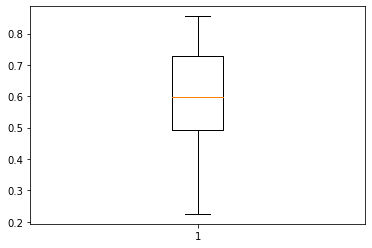

In [7]:
%matplotlib inline

print((df.energy.idxmin(), df.energy.min()))
print((df.energy.idxmax(), df.energy.max()))

plt.boxplot(df['energy'])
plt.show()

The track 'everything i wanted' from Billie Eilish seems to be an outlier for the energy column. 

(44, 0.351)
(27, 0.935)


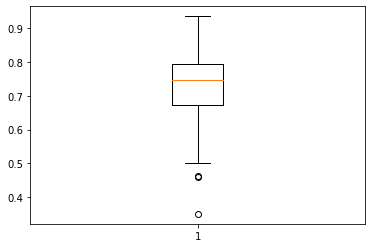

In [8]:
plt.boxplot(df['danceability'])
print((df.danceability.idxmin(), df.danceability.min()))
print((df.danceability.idxmax(), df.danceability.max()))

(24, -14.454)
(10, -3.28)


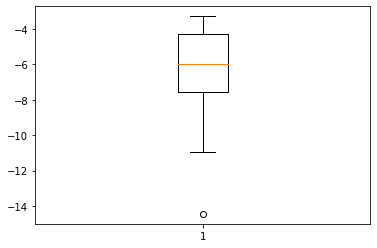

In [33]:
plt.boxplot(df['loudness'])
print((df.loudness.idxmin(), df.loudness.min()))
print((df.loudness.idxmax(), df.loudness.max()))

(0, 0.00146)
(44, 0.934)


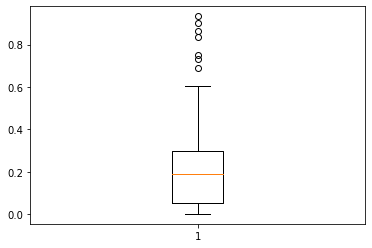

In [35]:
plt.boxplot(df['acousticness'])
print((df.acousticness.idxmin(), df.acousticness.min()))
print((df.acousticness.idxmax(), df.acousticness.max()))

(25, 0.029)
(19, 0.487)


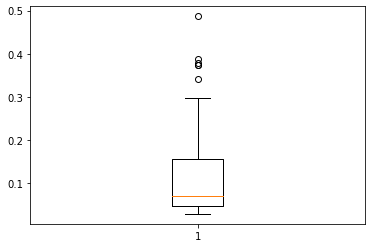

In [36]:
plt.boxplot(df['speechiness'])
print((df.speechiness.idxmin(), df.speechiness.min()))
print((df.speechiness.idxmax(), df.speechiness.max()))

(2, 0.029)
(3, 0.487)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f80941452e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8094145850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8094138fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8094145df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f80a2dcc100>],
 'means': []}

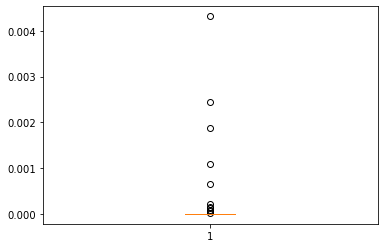

In [55]:
print((df.drop(axis=0, index=[24, 26]).instrumentalness.idxmin(), df.speechiness.min()))
print((df.drop(axis=0, index=[24, 26]).instrumentalness.idxmax(), df.speechiness.max()))
plt.boxplot(df.drop(axis=0, index=[24, 26])['instrumentalness'])

In [ ]:
print((df.drop(axis=0, index=[24, 26]).instrumentalness.idxmin(), df.speechiness.min()))
print((df.drop(axis=0, index=[24, 26]).instrumentalness.idxmax(), df.speechiness.max()))
plt.boxplot(df.drop(axis=0, index=[24, 26])['instrumentalness'])

(10, 0.0574)
(41, 0.792)


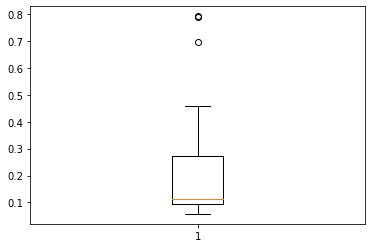

In [57]:
plt.boxplot(df['liveness'])
print((df.liveness.idxmin(), df.liveness.min()))
print((df.liveness.idxmax(), df.liveness.max()))

(36, 0.0605)
(37, 0.925)


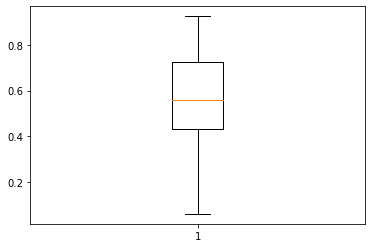

In [58]:
plt.boxplot(df['valence'])
print((df.valence.idxmin(), df.valence.min()))
print((df.valence.idxmax(), df.valence.max()))

(23, 140526)
(49, 312820)


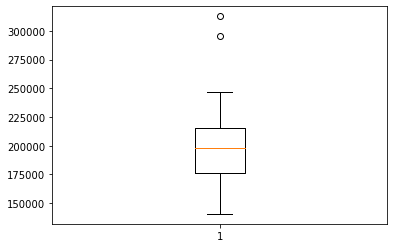

In [60]:
plt.boxplot(df['duration_ms'])
print((df.duration_ms.idxmin(), df.duration_ms.min()))
print((df.duration_ms.idxmax(), df.duration_ms.max()))

#### Are there any artists that have more than 1 popular track? If yes, which and how many?

In [16]:
track_count = df.groupby(['artist'])['artist'].count().sort_values(ascending=False)
track_count .where(track_count  > 1).dropna()

artist
Travis Scott     3.0
Billie Eilish    3.0
Dua Lipa         3.0
Justin Bieber    2.0
Post Malone      2.0
Harry Styles     2.0
Lewis Capaldi    2.0
Name: artist, dtype: float64

#### Who was the most popular artist?

In [17]:
# Finding the artists with more tracks among the popular artists.

popular_artist = track_count.where(track_count  == track_count.max()).dropna()
popular_artist

artist
Travis Scott     3.0
Billie Eilish    3.0
Dua Lipa         3.0
Name: artist, dtype: float64

In [18]:
# From the popular artist we get the artist that its position is lower in the 50 Top tracks list

most_popular_artist = df[df["artist"].isin(popular_artist.index.tolist())].iloc[0]
print(f'The most popular artist is {most_popular_artist.artist} with {popular_artist[most_popular_artist.artist]} tracks and lower position in the track list.')

The most popular artist is Dua Lipa with 3.0 tracks and lower position in the track list.


#### How many artists in total have their songs in the top 50?

In [19]:
print(f'{len(df.artist.unique())} artist in total have their song in the top 50 Spotify tracks.')

40 artist in total have their song in the top 50 Spotify tracks.


#### Are there any albums that have more than 1 popular track? If yes, which and how many?

In [20]:
track_count = df.groupby(['album'])['album'].count().sort_values(ascending=False)
track_count.where(track_count  > 1).dropna()

album
Future Nostalgia        3.0
Fine Line               2.0
Hollywood's Bleeding    2.0
Changes                 2.0
Name: album, dtype: float64

In [21]:
print(f'{len(df.album.unique())} albums in total have their songs in the top 50 Spotify tracks.')

45 albums in total have their songs in the top 50 Spotify tracks.


#### Which tracks have a danceability score above 0.7?

In [22]:
df[df['danceability'] > 0.7].head().sort_values(by='danceability', ascending=False)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.1040,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.6880,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.0123,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.0149,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.2470,0.1640,0.000000,0.1010,0.497,89.977,181733,Hip-Hop/Rap


#### Which tracks have a danceability score below 0.4?

In [23]:
df[df['danceability'] < 0.4].head().sort_values(by='danceability', ascending=False)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
44,Billie Eilish,lovely (with Khalid),lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,0.296,0.351,4,-10.109,0.934,0.0333,0.0,0.095,0.12,115.284,200186,Chamber-pop


#### Which tracks have their loudness above -5?

In [24]:
df[df['loudness'] > -5].head().sort_values(by='loudness', ascending=False)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
10,KAROL G,Tusa,Tusa,7k4t7uLgtOxPwTpFmtJNTY,0.715,0.803,2,-3.280,0.2950,0.2980,0.000134,0.0574,0.574,101.085,200960,Pop
12,Post Malone,Hollywood's Bleeding,Circles,21jGcNKet2qwijlDFuPiPb,0.762,0.695,0,-3.497,0.1920,0.0395,0.002440,0.0863,0.553,120.042,215280,Pop/Soft-Rock
6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.1220,0.0465,0.000000,0.3350,0.557,95.390,174000,Pop
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.0123,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco
16,Lewis Capaldi,Divinely Uninspired To A Hellish Extent (Exten...,Before You Go,2gMXnyrvIjhVBUZwvLZDMP,0.575,0.459,3,-4.858,0.6040,0.0573,0.000000,0.0885,0.183,111.881,215107,Alternative/Indie


#### Which tracks have their loudness below -8?

In [25]:
df[df['loudness'] < -8].head().sort_values(by='loudness', ascending=False)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
20,Jawsh 685,Savage Love (Laxed - Siren Beat),Savage Love (Laxed - Siren Beat),1xQ6trAsedVPCdbtDAmk0c,0.481,0.767,0,-8.520,0.234,0.0803,0.000000,0.2690,0.761,150.076,171375,Hip-Hop/Rap
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.123,0.0364,0.000000,0.0887,0.236,127.087,159382,R&B/Hip-Hop-alternative
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.731,0.1350,0.000000,0.6960,0.348,144.026,173333,Hip-Hop/Rap
15,Drake,Dark Lane Demo Tapes,Toosie Slide,466cKvZn1j45IpxDdYZqdA,0.490,0.830,1,-8.820,0.289,0.2090,0.000003,0.1130,0.845,81.604,247059,Hip-Hop/Rap
24,Billie Eilish,everything i wanted,everything i wanted,3ZCTVFBt2Brf31RLEnCkWJ,0.225,0.704,6,-14.454,0.902,0.0994,0.657000,0.1060,0.243,120.006,245426,Pop


#### Which track is the longest?

In [26]:
df.iloc[df['duration_ms'].idxmax()]

artist                        Travis Scott
album                           ASTROWORLD
track_name                      SICKO MODE
track_id            2xLMifQCjDGFmkHkpNLD9h
energy                                0.73
danceability                         0.834
key                                      8
loudness                            -3.714
acousticness                       0.00513
speechiness                          0.222
instrumentalness                       0.0
liveness                             0.124
valence                              0.446
tempo                              155.008
duration_ms                         312820
genre                          Hip-Hop/Rap
Name: 49, dtype: object

#### Which track is the shortest?

In [27]:
df.iloc[df['duration_ms'].idxmin()]

artist                            24kGoldn
album               Mood (feat. iann dior)
track_name          Mood (feat. iann dior)
track_id            3tjFYV6RSFtuktYl3ZtYcq
energy                               0.722
danceability                           0.7
key                                      7
loudness                            -3.558
acousticness                         0.221
speechiness                         0.0369
instrumentalness                       0.0
liveness                             0.272
valence                              0.756
tempo                               90.989
duration_ms                         140526
genre                              Pop-rap
Name: 23, dtype: object

#### Which genre is the most popular?

In [28]:
popular_genre = df.groupby(['genre'])['genre'].count().sort_values(ascending=False)
popular_genre

genre
Pop                                   14
Hip-Hop/Rap                           13
Dance/Electronic                       5
Alternative/Indie                      4
Electro-pop                            2
R&B/Soul                               2
Alternative/reggaeton/experimental     1
Chamber-pop                            1
Dance-pop/Disco                        1
Disco-pop                              1
Dreampop/Hip-Hop/R&B                   1
Hip-Hop/Trap                           1
Nu-disco                               1
Pop-rap                                1
Pop/Soft-Rock                          1
R&B/Hip-Hop-alternative                1
Name: genre, dtype: int64

#### Which genres have just one song on the top 50?

In [29]:
popular_genre[popular_genre == 1]

genre
Alternative/reggaeton/experimental    1
Chamber-pop                           1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Hip-Hop/Trap                          1
Nu-disco                              1
Pop-rap                               1
Pop/Soft-Rock                         1
R&B/Hip-Hop-alternative               1
Name: genre, dtype: int64

#### Which features are strongly positively correlated? Which features are strongly negatively correlated? Which features are not correlated?

Text(0.5, 1.0, 'Features correlation')

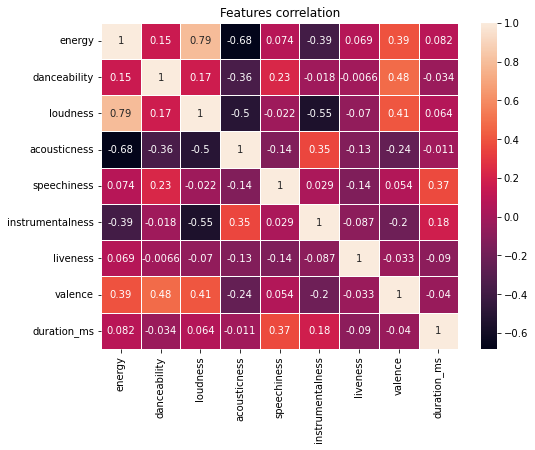

In [30]:
# Generate a heat map to visualize correlation between features using seaborn library imported below

import seaborn as sns

numerical_features = list(['energy', 'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'duration_ms'])
correlation = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, linewidths=.5).set_title('Features correlation')

Energy and loudness are strongly positively correlated.

Energy and acousticness, loudness and instrumentalness and acousticness are strongly negatively correlated.

There's no correlation between liveness and other features and duration with other features.

* How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
* How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
* How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [31]:
selected_features = ['danceability', 'loudness', 'acousticness']
selected_genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']

In [32]:
df.groupby(['genre'])[selected_features].aggregate([np.mean, np.max, np.min]).loc[selected_genres]

danceability                loudness                 \
                          mean   amax   amin      mean   amax    amin   
genre                                                                   
Pop                   0.677571  0.806  0.464 -6.460357 -3.280 -14.454   
Hip-Hop/Rap           0.765538  0.896  0.598 -6.917846 -3.370  -8.820   
Dance/Electronic      0.755000  0.880  0.647 -5.338000 -3.756  -7.567   
Alternative/Indie     0.661750  0.862  0.459 -5.421000 -4.746  -6.401   

                  acousticness                  
                          mean   amax     amin  
genre                                           
Pop                   0.323843  0.902  0.02100  
Hip-Hop/Rap           0.188741  0.731  0.00513  
Dance/Electronic      0.099440  0.223  0.01370  
Alternative/Indie     0.583500  0.751  0.29100

Hip-Hop / Rap and Dance / Electronic genres have a high danceability value with an average of 0.75 - 0.76 in comparison to Pop and Alternative/Indie genres.

The genre that contains the lowest loudness in decibels is Hip-Hop / Rap with -7.6480 mean value.

The most acoustic genre is Alternative / Indie with 0.58 mean value.